<a href="https://colab.research.google.com/github/SergeyPishchulov/CurrencyConverter/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%22%D0%94%D0%A3_%E2%84%966_%D0%9A%D0%BB%D0%B8%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
import numpy.random as rand
import random
import pylab
import math

In [ ]:
EPSILON = 2.5 * 1e-3

def get_d_m0(a,b): return b**2+2*b-4*a+1
def get_d_m1(a,b): return a**2+6*a-8*b+1

def get_lambda_m0(a,b, d):
  l1=(b-1+cmath.sqrt(d))/2
  l2=(b-1-cmath.sqrt(d))/2 
  return l1,l2

def get_lambda_m1(a,b, d):
  l1=(a-1+cmath.sqrt(d))/2
  l2=(a-1-cmath.sqrt(d))/2 
  return l1,l2   

def get_lambda_m2(a, b, d):
  l1=(a-1+cmath.sqrt(d))/2
  l2=(a-1-cmath.sqrt(d))/2 
  return l1,l2 

def get_color(a, b, get_d, get_lambda, epsilon=2.5 * 1e-3):
    if b<=a and get_lambda==get_lambda_m1:
      return 6
    d=get_d(a,b)
    l1, l2 = get_lambda(a,b, d)
    if d >= -epsilon:
      if l1.real > epsilon and l2.real>epsilon:
        return 0 # Неустойчивый узел
      if l1.real < -epsilon and l2.real < -epsilon:
        return 1 # Устойчивый узел 
      return 2 # Седло
    if abs(l1.real) < epsilon:
      return 3 # Центр
    if l1.real > 0:
      return 4 # Неустойчивый фокус
    return 5 # Устойчивый фокус

def get_portarit_type(c):
  if c==0:
    return "Неустойчивый узел"
  if c==1:
    return "Устойчивый узел"
  if c==2:
    return "Седло"
  if c==3:
    return "Центр"
  if c==4:
    return "Неустойчивый фокус"
  if c==5:
    return "Устойчивый фокус"
  if c==6:
    return None #Не существует

#Типы фазовых портретов

In [ ]:
def mean(s):
  l=sorted(list(s))
  middleIndex = int((len(l) - 1)/2)
  return l[middleIndex]

def get_color_by_parameters(a,b, eq_point):
  if eq_point=="m0":
    get_d, get_lambda =get_d_m0, get_lambda_m0
  if eq_point=="m1":
    get_d, get_lambda =get_d_m1, get_lambda_m1
  return get_color(a,b,get_d, get_lambda)


def get_portarit_type_by_parameters(a,b, eq_point):
  color=get_color_by_parameters(a,b, eq_point)  
  return get_portarit_type(color)

def get_all_portrait_types():
  al=np.linspace(0.5, 1.5, 1001)
  bl=np.linspace(0, 3, 3001)
  params_by_type={}
  for a in al:
    for b in bl:
      t0=get_portarit_type_by_parameters(a,b,'m0')
      t1=get_portarit_type_by_parameters(a,b,'m1')
      p=(t0,t1)
      if not p in params_by_type: params_by_type[p]=set()
      params_by_type[p].add((a,b))
  res=[]
  for t in params_by_type:
    a,b=mean(params_by_type[t])
    res.append((t, a, b))
  return res

def get_all_portrait_types_sed_sed():
  al=np.linspace(0.5, 1.5, 1001)
  bl=np.linspace(0, 3, 3001)
  params_by_type={}
  for a in al:
    for b in bl:
      t0=get_portarit_type_by_parameters(a,b,'m0')
      t1=get_portarit_type_by_parameters(a,b,'m1')
      p=(t0,t1)
      if p==('Седло', 'Седло'):
        if not p in params_by_type: params_by_type[p]=set()
        params_by_type[p].add((a,b))
  return params_by_type
#get_all_portrait_types_sed_sed()[('Седло', 'Седло')]

In [ ]:
types=[
(('Устойчивый фокус', None), 1.069, 0.014),
 (('Устойчивый узел', None), 0.597, 0.583),
 (('Седло', None), 0.996, 0.996),
  (('Седло', 'Устойчивый узел'), 0.601, 0.62),
  (('Седло', 'Устойчивый фокус'), 0.7, 2),
  (('Седло', 'Седло'), 1.009, 1.0090000000000001),
  (('Седло', 'Центр'), 1, 2),
  (('Центр', None), 1.25, 1.004),
  (('Неустойчивый фокус', None), 1.3519999999999999, 1.1380000000000001),
  (('Седло', 'Неустойчивый фокус'), 1.3, 2),
  (('Неустойчивый узел', None), 1.391, 1.3820000000000001),
  (('Седло', 'Неустойчивый узел'), 1.399, 1.401)
]
def all_types_are_correct(types):
  all_correct=True
  for ((t0, t1), a, b) in types:
    t0_expected=get_portarit_type_by_parameters(a,b,'m0')
    t1_expected=get_portarit_type_by_parameters(a,b,'m1')
    if (t0,t1)!=(t0_expected, t1_expected):
      raise ValueError(f"expected {(t0_expected, t1_expected)}, but was {(t0,t1)}, a={a}, b={b}")
    all_correct=all_correct and (t0,t1)==(t0_expected, t1_expected)
  return all_correct
print(f'ALL TYPES ARE CORRECT:{ all_types_are_correct(types)}')


ALL TYPES ARE CORRECT:True


####Определение типа по парметрам

In [ ]:
a,b=1, 0
print(get_portarit_type_by_parameters(a,b,'m0'), get_portarit_type_by_parameters(a,b,'m1'))

Устойчивый фокус None


#Бифуркационная диаграмма типов фазовых портретов по параметрам

###M0 & M1 отдельно

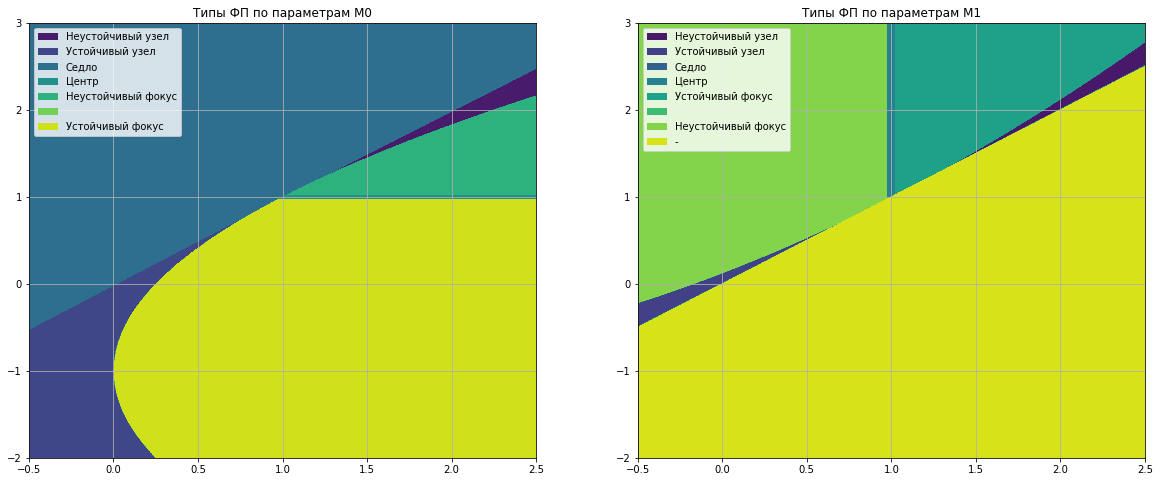

In [ ]:
a_line=np.linspace(-0.5, 2.5, 1001)
b_line=np.linspace(-2, 3, 1001)
xx, yy = np.meshgrid(a_line, b_line)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(20) 
mycmap1 = plt.get_cmap('rainbow')

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

colors_m0 = np.vectorize(get_color)(xx, yy, get_d_m0, get_lambda_m0, epsilon=15 * 1e-3)
h = ax1.contourf(a_line, b_line, colors_m0)
ax1.set_title("Типы ФП по параметрам М0")
ax1.axis()
ax1.grid()
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in h.collections]

ax1.legend(proxy, ["Неустойчивый узел", "Устойчивый узел", "Седло", "Центр", "Неустойчивый фокус","","Устойчивый фокус", "0"], loc='upper left')

colors_m1 = np.vectorize(get_color)(xx, yy, get_d_m1, get_lambda_m1, epsilon=15 * 1e-3)
h = ax2.contourf(a_line, b_line, colors_m1)
ax2.set_title("Типы ФП по параметрам М1")
ax2.axis()
ax2.grid()
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in h.collections]

ax2.legend(proxy, ["Неустойчивый узел", "Устойчивый узел", "Седло", "Центр", "Устойчивый фокус","","Неустойчивый фокус", "-"], loc='upper left')


plt.show() 

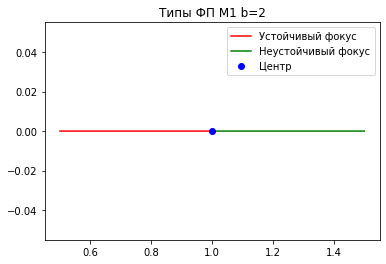

In [ ]:
a_line = np.linspace(0.5, 1.5, 100001)
b = 2


stab_cycle, unstab_cycle, center = [], [], []
for a in a_line:
  color = get_color(a, b, get_d_m1, get_lambda_m1, epsilon = 1e-6)
  if color == 4:
    unstab_cycle.append(a)
  elif color == 5:
    stab_cycle.append(a)
  elif color == 3:
    center.append(a)
  else:
    raise RuntimeError("Unknown color :(")

fig, ax = plt.subplots()

line1, = ax.plot(stab_cycle, np.zeros(len(stab_cycle)), 'r', label='Устойчивый фокус')
line2, = ax.plot(unstab_cycle, np.zeros(len(unstab_cycle)), 'g', label='Неустойчивый фокус')
line3, = ax.plot(center, np.zeros(len(center)), 'bo', label='Центр')

ax.legend()
plt.title("Типы ФП М1 b=2")
plt.show()

###M0 & M1 совместно

In [ ]:
def get_color_by_parameters(a,b, eq_point):
  if eq_point=="m0":
    get_d, get_lambda =get_d_m0, get_lambda_m0
  if eq_point=="m1":
    get_d, get_lambda =get_d_m1, get_lambda_m1
  return get_color(a,b,get_d, get_lambda)

def get_portarit_type_by_parameters(a,b, eq_point):
  color=get_color_by_parameters(a,b, eq_point)  
  return get_portarit_type(color)
# t=[('Неустойчивый фокус', None), ('Седло', 'Неустойчивый фокус'), ('Устойчивый фокус', None), ('Седло', None), ('Неустойчивый узел', None), ('Седло', 'Неустойчивый узел'), ('Седло', 'Центр'), ('Седло', 'Устойчивый узел'), ('Центр', None), ('Седло', 'Седло'), ('Седло', 'Устойчивый фокус'), ('Устойчивый узел', None)]

# s=set()
# levels=set()
# def get_color_joint(a,b):
#   type1, type2 = get_color_by_parameters(a,b,'m0'), get_color_by_parameters(a,b,'m1')
#   t1=get_portarit_type_by_parameters(a,b,'m0')
#   t2=get_portarit_type_by_parameters(a,b,'m1')
#   res=t.index((t1,t2))
#   levels.add(res)
#   return res


# a_line=np.linspace(0, 2, 3001)
# b_line=np.linspace(-1, 3, 2001)
# xx, yy = np.meshgrid(a_line, b_line)
# mycmap1 = plt.get_cmap('gist_ncar')
# fig = plt.figure()
# fig.set_figheight(12)
# fig.set_figwidth(20) 
# colors = np.vectorize(get_color_joint)(xx, yy)
# levels=sorted(list(levels))
# h=plt.contourf(a_line, b_line, colors,cmap=mycmap1, levels=13)
# plt.grid()
# proxy = [plt.Rectangle((1, 1), 2, 2, fc=pc.get_facecolor()[0]) for pc in h.collections]
# titles=[f"{l}; {t[l]} " for l in levels]
# plt.legend(proxy, titles,loc='upper left')

#plt.show()# некорректные подписи

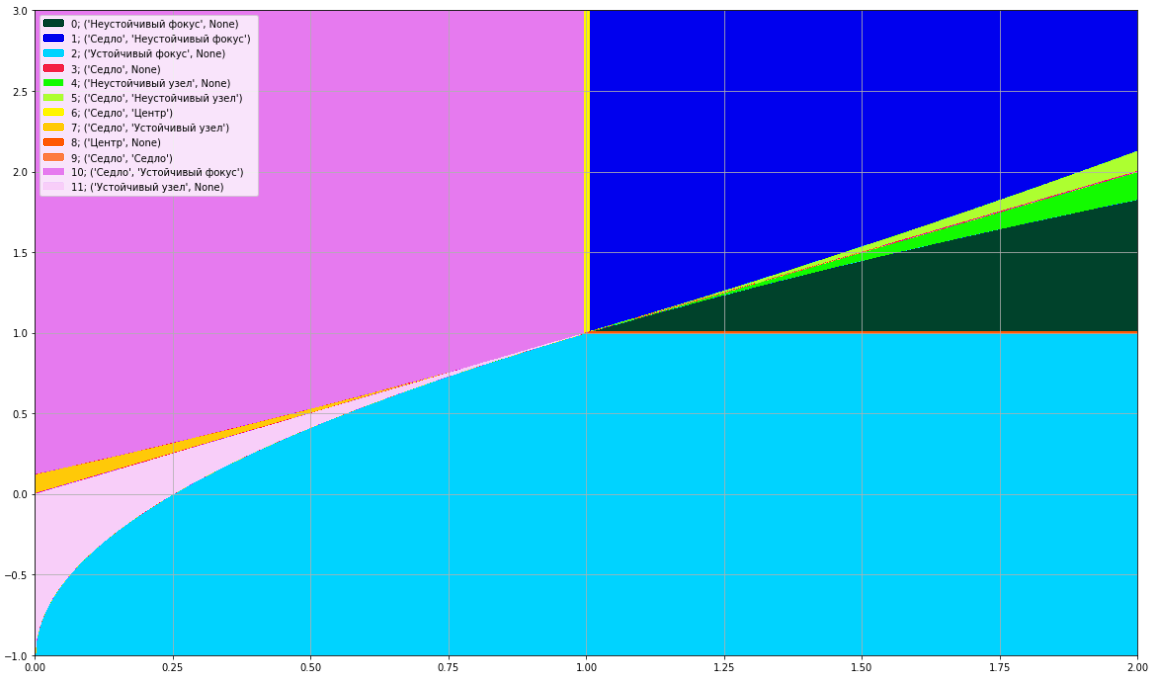

#Рунге-Кутт

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
t_delta=0.001
t = np.arange(0,5,t_delta)
a=1
b=2


def get_plot(x0, y0, a=1, b=2, points_count=10**5, tm=10**3):
  xs=np.zeros(points_count)
  ys=np.zeros(points_count)
  xs[0]=x0
  ys[0]=y0

  for t in range(1, points_count):
    x=xs[t-1]
    y=ys[t-1]
    xv=(y-x)/tm
    yv=(-a*x+b*y-x*x*y)/tm
    xs[t]=x+xv
    ys[t]=y+yv
  return xs, ys

def f(x, y, a, b, reverse=False): # dx/dt
  return (-1 if reverse else 1) * (y - x)

def g(x, y, a, b, reverse=False): # dy/dt
  return (-1 if reverse else 1) * (-a * x + b * y - x * x * y)

def get_next(x, y, a, b, h, reverse=False):
  k1 = h * f(x, y, a, b, reverse=reverse)
  l1 = h * g(x, y, a, b, reverse=reverse)
  k2 = h * f(x + k1 / 2, y + l1 / 2, a, b, reverse=reverse)
  l2 = h * g(x + k1 / 2, y + l1 / 2, a, b, reverse=reverse)
  k3 = h * f(x + k2 / 2, y + l2 / 2, a, b, reverse=reverse)
  l3 = h * g(x + k2 / 2, y + l2 / 2, a, b, reverse=reverse)
  k4 = h * f(x + k3, y + l3, a, b, reverse=reverse)
  l4 = h * g(x + k3, y + l3, a, b, reverse=reverse)
  return (x + (k1 + 2 * k2 + 2 * k3 + k4) / 6,
            y + (l1 + 2 * l2 + 2 * l3 + l4) / 6)

def get_plot_runge_kutt(x0, y0, a=1, b=2, h=1e-3, points_count=10**7):
  xs=np.zeros(points_count)
  ys=np.zeros(points_count)
  xs[0]=x0
  ys[0]=y0

  for t in range(1, points_count):
    x=xs[t-1]
    y=ys[t-1]
    (xs[t], ys[t]) = get_next(x,y, a,b,h)
  return xs, ys



#Предельные циклы Functions

In [ ]:
EPS=0.005

def get_cycle_start(tuples, x_eq, y_eq, epsilon, printing=True):
  xp_cur=None
  xp_prev=None
  min_dist=1000
  for i in range(len(tuples)-1):
    prev_x, prev_y = tuples[i-1]
    cur_x, cur_y = tuples[i]    
    if prev_y>y_eq and cur_y<y_eq:
        xp_prev=xp_cur
        xp_cur=cur_x
        # print("Zero", xp_cur, xp_prev)
        if xp_prev: min_dist=min(min_dist, abs(xp_cur-xp_prev))
        if xp_prev and abs(xp_cur-xp_prev)<epsilon:
          if printing: plt.plot(cur_x, cur_y,'ro',color='m')
          return cur_x, y_eq
  lists=list(map(list, zip(*tuples)))
  xs, ys = lists[0], lists[1]
  plt.plot(xs, ys, color='g')
  plt.plot(xs, [y_eq]*len(xs), color='r')
  plt.show()
  raise RuntimeError(f"Стартовая точка не найдена; min_dist={min_dist}; need epsilon={epsilon}")


def get_cycle(xs, ys, x_eq, y_eq, epsilon=EPS, printing=True):
  tuples=list(zip(xs, ys))
  start_x, start_y = get_cycle_start(tuples, x_eq, y_eq,epsilon, printing)
  start_found=False
  cycle=[]
  min_dist=10000
  was_opposite_x=False
  for i in range(len(tuples)-1):
    prev_x, prev_y =tuples[i-1]
    cur_x, cur_y = tuples[i]
    min_dist=min([min_dist, abs(cur_x-start_x)+ abs(cur_y-y_eq)])
    if not start_found and abs(cur_x-start_x)<epsilon and abs(cur_y-y_eq)<epsilon:
      start_found=True
      continue
    if start_found:
      cycle.append((cur_x, cur_y))
      if cur_x < x_eq: was_opposite_x=True
      if was_opposite_x and cur_x > x_eq and prev_x > x_eq and (cur_y-y_eq)*(prev_y-y_eq)<0:
        lists=list(map(list, zip(*cycle)))
        return lists[0], lists[1]
  if not start_found:
    print(f"START NOT FOUND; min_dist={min_dist}, epsilon={epsilon}")
    plt.plot(xs, ys, color='g')
    plt.show()
  raise RuntimeError(f"Цикл не найден; start found = {start_found}")



def print_plots_in_cycle_area(cycle):
  all_coordiantes=list(zip(cycle[0], cycle[1]))
  c_min=np.amin(all_coordiantes)
  c_max=np.amax(all_coordiantes)
  for i in range(5):
    k=1.3
    x0=random.uniform(c_min*k,c_max*k)
    y0=random.uniform(c_min*k,c_max*k)
    plt.plot(*get_plot(x0, y0), color='#4169E1')
    length=c_max-c_min
    r=0.2
    x0=(c_min+c_max)/2+length*random.uniform(-r, r)
    y0=(c_min+c_max)/2+length*random.uniform(-r, r)
    # y0=(c_min+c_max)/2*(1+random.random())
    plt.plot(*get_plot(x0, y0), color='#4169E1')



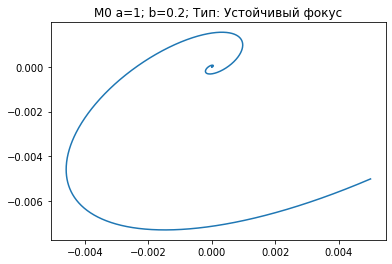

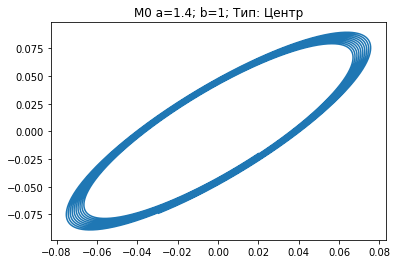

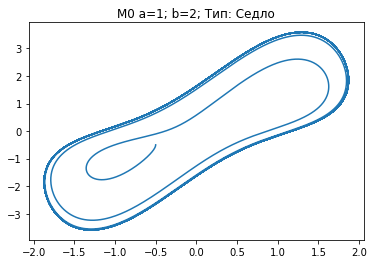

In [ ]:
abxy=[(1,0.2, 0.005, -0.005), (1.4, 1, 0.02, -0.02), (1,2, -0.5, -0.5)]
for (a, b, x0, y0) in abxy:
  plt.plot (*get_plot(x0, y0, a=a, b=b, points_count=10**4, tm=100))
  plt.title (f"M0 a={a}; b={b}; Тип: {get_portarit_type_by_parameters(a,b,'m0')}")
  plt.show()

#Орбиты циклов

In [ ]:
for (a,b) in [(1,2), (1.4, 2)]:
  equilibrium_points=[(0,0), (math.sqrt(b-a), math.sqrt(b-a)), (-math.sqrt(b-a),-math.sqrt(b-a)) ]

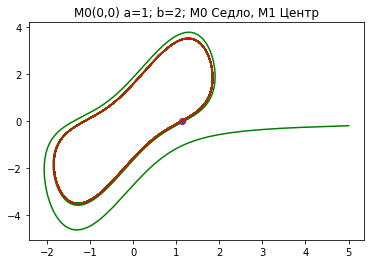

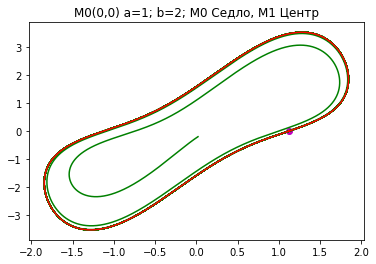

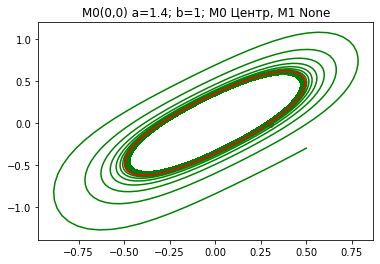

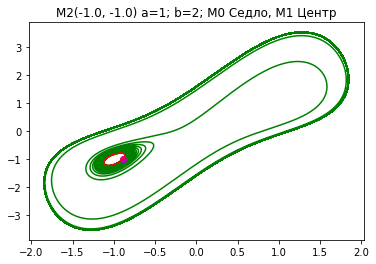

In [ ]:
equilibrium_point=equilibrium_points[0]
x_eq, y_eq = equilibrium_point

a,b =1,2
xs, ys = get_plot_runge_kutt(x0=5, y0=-0.2, a=a, b=b, points_count=10**5)
cycle=get_cycle(xs, ys, x_eq, y_eq)
# print_plots_in_cycle_area(cycle)
plt.plot(xs, ys, color='g')
plt.plot(cycle[0], cycle[1], color='r')
plt.title(f"M0(0,0) a={a}; b={b}; M0 {get_portarit_type_by_parameters(a,b,'m0')}, M1 {get_portarit_type_by_parameters(a,b,'m1')}")
plt.show()

a,b =1,2
xs, ys = get_plot_runge_kutt(x0=0.02, y0=-0.2, a=a, b=b, points_count=10**5)
cycle=get_cycle(xs, ys, x_eq, y_eq)
# print_plots_in_cycle_area(cycle)
plt.plot(xs, ys, color='g')
plt.plot(cycle[0], cycle[1], color='r')
plt.title(f"M0(0,0) a={a}; b={b}; M0 {get_portarit_type_by_parameters(a,b,'m0')}, M1 {get_portarit_type_by_parameters(a,b,'m1')}")
plt.show()

a, b=1.4, 1
xs, ys = get_plot(x0=0.5, y0=-0.3, a=a, b=b, points_count=10**6, tm=10)
cycle=get_cycle(xs, ys, x_eq, y_eq)
# print_plots_in_cycle_area(cycle)
plt.plot(xs, ys, color='g')
plt.plot(cycle[0], cycle[1], color='r')
plt.title(f"M0(0,0) a={a}; b={b}; M0 {get_portarit_type_by_parameters(a,b,'m0')}, M1 {get_portarit_type_by_parameters(a,b,'m1')}")
plt.show()

a,b = 1, 2
x_eq, y_eq = (-math.sqrt(b-a),-math.sqrt(b-a))
xs, ys = get_plot_runge_kutt(x0=-1.1, y0=-1.2, a=a, b=b, points_count=10**6)
# print_plots_in_cycle_area(cycle)
plt.plot(xs, ys, color='g')
cycle=get_cycle(xs, ys, x_eq, y_eq)
plt.plot(cycle[0], cycle[1], color='r')
plt.title(f"M2{x_eq, y_eq} a={a}; b={b}; M0 {get_portarit_type_by_parameters(a,b,'m0')}, M1 {get_portarit_type_by_parameters(a,b,'m1')}")
plt.show()


# t0=get_portarit_type_by_parameters(a,b,'m0')
#       t1=get_portarit_type_by_parameters(a,b,'m1')

#Периоды циклов

In [ ]:
def get_eq_points_m0(a,b): return 0,0
def get_eq_points_m1(a,b): return (math.sqrt(b-a), math.sqrt(b-a))
def get_eq_points_m2(a,b): return (-math.sqrt(b-a), -math.sqrt(b-a))



def get_periods(x0, y0, get_eq, a_line, b, h, epsilon=EPS):
  ts=[]
  for a in a_line:
    x_eq, y_eq = get_eq(a,b)
    xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, h=h, points_count=10**6)
    cycle=get_cycle(xs, ys, x_eq, y_eq,epsilon, printing=False)
    n=len(cycle[0])
    # plt.plot(cycle[0], cycle[1], color=f'{n/1000}')    
    plt.plot(cycle[0], cycle[1])    
    t=n*h
    ts.append(t)
  plt.show()
  return ts

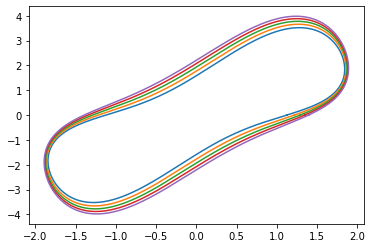

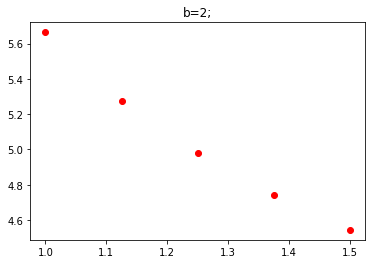

In [ ]:
b=2
a_line=np.linspace(1, 1.5, 5)#при а ~<0.7 траектория не успевает походить по циклу и уходит на устойчивый фокус
# a_line=[1, 1.2, 1.5]
h=1e-4
x_eq, y_eq = 0, 0
ts=get_periods(x0=2, y0=0.2, get_eq=get_eq_points_m0, a_line=a_line, b=b, h=h)
# print("TS:", ts)
plt.plot(a_line, ts, "ro")
plt.title(f"b={b};")
plt.show()

# Атлас фазовых портретов

##Атлас functions

In [ ]:
def all_types_are_correct_d(start_points_by_portrait_type):
  all_correct=True
  for (t0, t1) in start_points_by_portrait_type:
    a,b,starts=start_points_by_portrait_type[(t0,t1)]
    t0_expected=get_portarit_type_by_parameters(a,b,'m0')
    t1_expected=get_portarit_type_by_parameters(a,b,'m1')
    all_correct=all_correct and (t0,t1)==(t0_expected, t1_expected)
  return all_correct
all_types_are_correct([(('Седло', 'Устойчивый фокус'), 0.75, 2), (('Седло', 'Неустойчивый фокус'), 1.25, 2)])


True

In [ ]:
# types=get_all_portrait_types()


start_points_by_portrait_type={
    ('Устойчивый фокус', 'Седло'):(1.066, 0.913,[(None, None)]),
    ('Устойчивый узел', 'Седло'):(0.6, 0.56,[(None, None)]),
    ('Седло', 'Устойчивый узел'):(0.58, 0.592,[(0.1,0.1), (0.1,0.15)]),
    ('Седло', 'Устойчивый фокус'):(0.73, 2.277,[(None, None)]),
    ('Неустойчивый фокус', 'Седло'):( 1.348, 1.284,[(None, None)]),
    ('Седло', 'Неустойчивый фокус'):( 1.237, 1.394,[(None, None)]),
    ('Неустойчивый узел', 'Седло'):(1.388, 1.37,[(None, None)]),
    ('Седло', 'Неустойчивый узел'):(1.409, 1.425,[(None, None)])
}
print(f'ALL TYPES ARE CORRECT:{ all_types_are_correct_d(start_points_by_portrait_type)}')

def get_point_on_circle(x0,y0, r, n):
  angle=0
  res=[]
  for i in range(n):
    angle+=(6.28/n)
    res.append((x0+r*math.cos(angle), y0+r*math.sin(angle)))
  return res

ALL TYPES ARE CORRECT:False


##Атлас

##### Типы и коэффициенты

In [ ]:
types=[
(('Устойчивый фокус', None), 1, 0.5),
 (('Устойчивый узел', None), 0.6, 0.58),
 (('Седло', None), 0.9, 0.9),
  (('Седло', 'Устойчивый узел'), 0.601, 0.62),
  (('Седло', 'Устойчивый фокус'), 0.7, 2),
  (('Седло', 'Седло'), 1.009, 1.0090000000000001),
  (('Седло', 'Центр'), 1, 2),
  (('Центр', None), 1.25, 1.004),
  (('Неустойчивый фокус', None), 1.3519999999999999, 1.1380000000000001),
  (('Седло', 'Неустойчивый фокус'), 1.3, 2),
  (('Неустойчивый узел', None), 1.391, 1.3820000000000001),
  (('Седло', 'Неустойчивый узел'), 1.399, 1.401)
]

#### #0

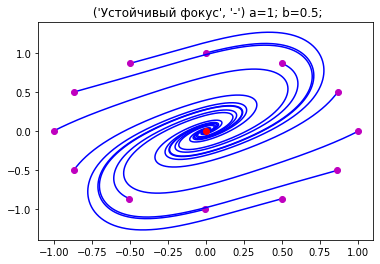

In [ ]:
#0
(t0, t1), a,b = types[0]
m1_des=""
if b>=a:
    x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
    plt.plot(x_eq,y_eq,'mo')
    shift = (0.1, 0.1)
    x0=x_eq+shift[0]
    y0=y_eq+shift[1]
    plt.plot(x0,y0,'ro')
    xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, h=1e-2, points_count=10**5)
    m1_des =f"M1{x_eq, y_eq};"
    plt.plot(xs, ys, color='g')
else:
  t1="-"
for (x0,y0) in get_point_on_circle(0,0,1,12):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, h=1e-2, points_count=10**5)
  plt.plot(xs, ys, color='b')
  plt.plot(x0, y0,'mo')
plt.plot(0,0,'ro')

plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")
plt.show()

#### #1

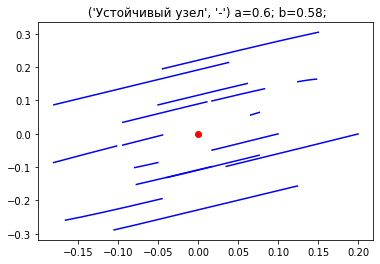

eig values: [-0.36524175 -0.05475825]


In [ ]:
#1
(t0, t1), a,b = types[1]
m1_des=""
if b>=a:
    x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
    plt.plot(x_eq,y_eq,'mo')
    shift = (0.1, 0.1)
    x0=x_eq+shift[0]
    y0=y_eq+shift[1]
    plt.plot(x0,y0,'ro')
    xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=10**3)
    m1_des =f"M1{x_eq, y_eq};"
    plt.plot(xs, ys, color='g')
else:
  t1="-"

for (x0,y0) in get_point_on_circle(0,0,0.2,7):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=10**3)
  plt.plot(xs, ys, color='b')

for (x0,y0) in get_point_on_circle(0,0,0.1,9):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=10**3)
  plt.plot(xs, ys, color='b')
  # plt.plot(x0, y0,'mo')
plt.plot(0,0,'ro')

plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")
plt.show()

#EIG values
jacobian_matrix=[[-1, 1],
                 [-a, b]]
eig_values, eig_vectors = np.linalg.eig(jacobian_matrix)
print("eig values:", eig_values)
# print("eig vectors:", eig_vectors)

#### #2

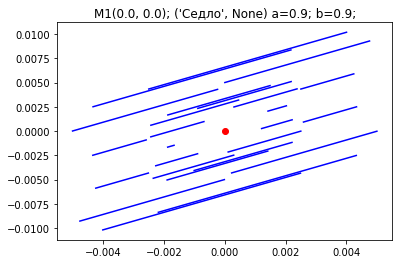

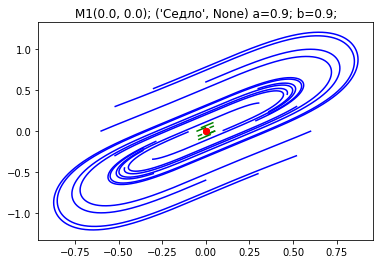

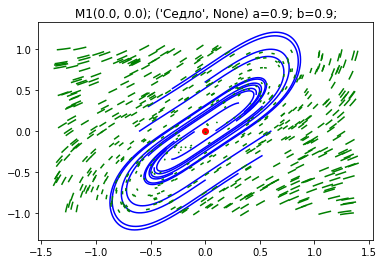

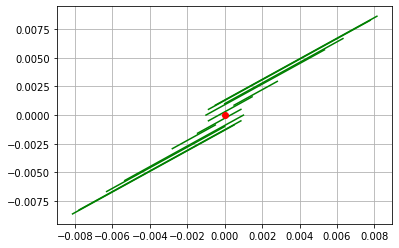

eig values: [-1.00000000e-01 -5.55111512e-16]


In [ ]:
number=2#TODO Не похоже на седло.
(t0, t1), a,b = types[number]

def print_tracks_start_in_circle(r=0.6, n=12):
  for (x0,y0) in get_point_on_circle(0,0,0.6,n=12):
    xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=10**4)
    plt.plot(xs, ys, color='b')
    # plt.plot(x0, y0,'mo')
  plt.plot(0,0,'ro')
  plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")

#M0 вблизи
for (r,n) in [(0.005,12), (0.0025,13)]:
  for (x0,y0) in get_point_on_circle(0,0,r,n):
      xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, h=1e-4, points_count=10**4)
      plt.plot(xs, ys, color='b')
plt.plot(0,0,'ro')
# plt.plot(math.sqrt(b-a),math.sqrt(b-a), 'mo')
plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")
plt.show()

m1_des=""
if b>=a:
    x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
    plt.plot(x_eq,y_eq,'go')
    for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.05,n=6):
      xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=10**3)
      plt.plot(xs, ys, color='g')
    plt.plot(x_eq, y_eq,'ro')
    m1_des =f"M1{x_eq, y_eq};"
    plt.plot(xs, ys, color='g')
else:
  t1="-"

print_tracks_start_in_circle()
plt.show()

#almost isocline
print_tracks_start_in_circle()
for i in range(600):
  xr=1.4
  yr=1
  x0=random.uniform(-xr, xr)
  y0=random.uniform(-yr, yr)
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=50)
  plt.plot(xs, ys, color='g')

plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")
plt.show()
#Отдельно М1, М2
x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.001,n=12):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=10**4)
  plt.plot(xs, ys, color='g')
  # plt.plot(x0, y0,'go')
plt.plot(x_eq, y_eq,'ro')
plt.grid()
plt.show()

#EIG values
jacobian_matrix=[[-1, 1],
                 [-a, b]]
eig_values, eig_vectors = np.linalg.eig(jacobian_matrix)
print("eig values:", eig_values)
# print("eig vectors:", eig_vectors)

#### #3

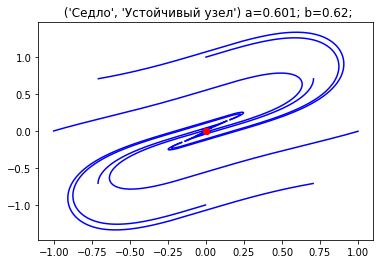

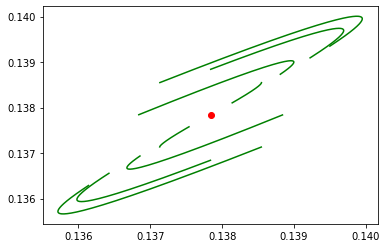

In [ ]:
number=3#TODO Не очень похоже на седло
(t0, t1), a,b = types[number]
m1_des=""
if b>=a:
    # x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
    x_eq_m1, y_eq_m1 = x_eq, y_eq 
    # plt.plot(x_eq,y_eq,'go')
    # for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.3,n=6):
    #   xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=10**5)
    #   plt.plot(xs, ys, color='g')
    # plt.plot(x_eq, y_eq,'ro')
    # m1_des =f"M1{x_eq, y_eq};"
    # plt.plot(xs, ys, color='g')
else:
  t1="-"
#Вблизи М0
for (x0,y0) in get_point_on_circle(0,0,0.03,n=5):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=50000)
  plt.plot(xs, ys, color='b')
  # plt.plot(x0, y0,'mo')

for (x0,y0) in get_point_on_circle(0,0,1.,n=8):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=20000)
  plt.plot(xs, ys, color='b')
  # plt.plot(x0, y0,'mo')
plt.plot(0,0,'ro')

plt.plot(x_eq_m1, y_eq_m1, 'ro')
plt.plot(-x_eq_m1, -y_eq_m1, 'ro')
plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")

#Cycles

# xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, h=1e-4, points_count=10**6)
# cycle=get_cycle(xs, ys, x_eq, y_eq,epsilon=EPS, printing=False)
# plt.plot(xs, ys, color='r')
# plt.plot(cycle[0], cycle[1], color='r')

plt.show()
#Отдельно Устойчивый фокус в М1, М2
x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.001,n=8):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=10**4)
  plt.plot(xs, ys, color='g')
  # plt.plot(x0, y0,'go')
plt.plot(x_eq, y_eq,'ro')
plt.show()

#### #4 (a=0.7, b=2)

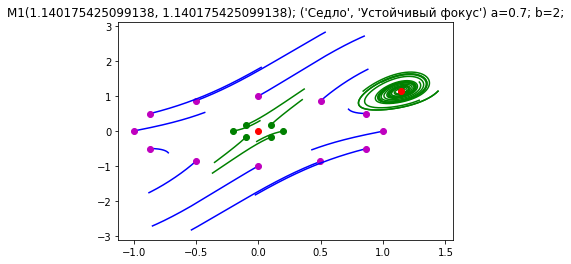

In [ ]:
number=4
(t0, t1), a,b = types[number]
m1_des=""
if b>=a:
    x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
    x_eq_m1, y_eq_m1 = x_eq, y_eq 
    plt.plot(x_eq,y_eq,'go')
    for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.3,n=6):
      xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=10**4)
      plt.plot(xs, ys, color='g')
    plt.plot(x_eq, y_eq,'ro')
    m1_des =f"M1{x_eq, y_eq};"
    plt.plot(xs, ys, color='g')
else:
  t1="-"

for (x0,y0) in get_point_on_circle(0,0,1.,n=12):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=600)
  plt.plot(xs, ys, color='b')
  plt.plot(x0, y0,'mo')

for (x0,y0) in get_point_on_circle(0,0,0.2,n=6):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=1000)
  plt.plot(xs, ys, color='g')
  plt.plot(x0, y0,'go')
plt.plot(0,0,'ro')

plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")
plt.show()


#### #5

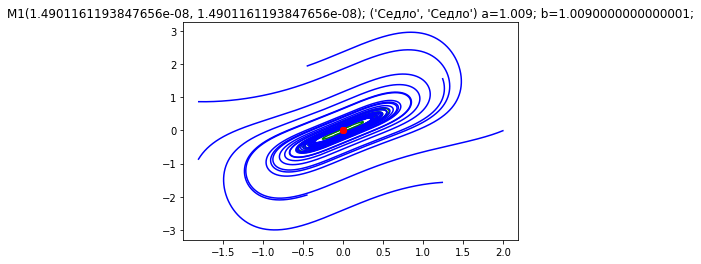

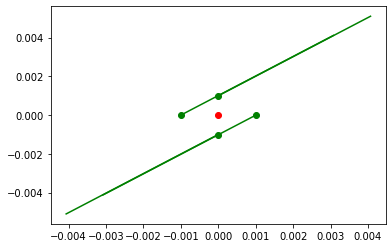

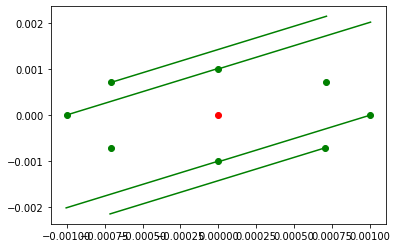

In [ ]:
number=5#TODO Не очень похоже на седло
(t0, t1), a,b = types[number]
m1_des=""
if b>=a:
    x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
    x_eq_m1, y_eq_m1 = x_eq, y_eq 
    plt.plot(x_eq,y_eq,'go')
    for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.2,n=10):
      xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=20000)
      plt.plot(xs, ys, color='g')
    plt.plot(x_eq, y_eq,'ro')
    m1_des =f"M1{x_eq, y_eq};"
    # plt.plot(xs, ys, color='g')
else:
  t1="-"

for (x0,y0) in get_point_on_circle(0,0,2,n=7):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=50000)
  plt.plot(xs, ys, color='b')
plt.plot(0,0,'ro')

plt.plot(x_eq_m1, y_eq_m1, 'ro')
plt.plot(-x_eq_m1, -y_eq_m1, 'ro')
plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")


plt.show()
#Отдельно Неустойчивый фокус в М1, М2
x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.001,n=4):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=4000)
  plt.plot(xs, ys, color='g')
  plt.plot(x0, y0,'go')
plt.plot(x_eq, y_eq,'ro')
plt.show()
x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.001,n=8):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=1000)
  plt.plot(xs, ys, color='g')
  plt.plot(x0, y0,'go')
plt.plot(x_eq, y_eq,'ro')
plt.show()

#### #6 (a=1, b=2)

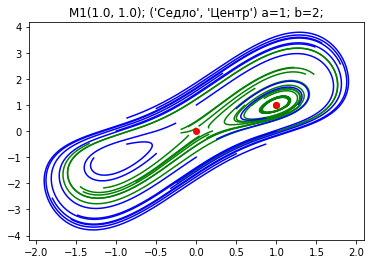

In [ ]:
number=6
(t0, t1), a,b = types[number]
m1_des=""
if b>=a:
    x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
    x_eq_m1, y_eq_m1 = x_eq, y_eq 
    plt.plot(x_eq,y_eq,'go')
    for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.3,n=6):
      xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=10**4)
      plt.plot(xs, ys, color='g')
    plt.plot(x_eq, y_eq,'ro')
    m1_des =f"M1{x_eq, y_eq};"
    plt.plot(xs, ys, color='g')
else:
  t1="-"

for (x0,y0) in get_point_on_circle(0,0,1.,n=12):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=4000)
  plt.plot(xs, ys, color='b')
  # plt.plot(x0, y0,'mo')

for (x0,y0) in get_point_on_circle(0,0,0.2,n=9):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=2000)
  plt.plot(xs, ys, color='g')
  # plt.plot(x0, y0,'go')
plt.plot(0,0,'ro')

plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")
plt.show()


#### #7

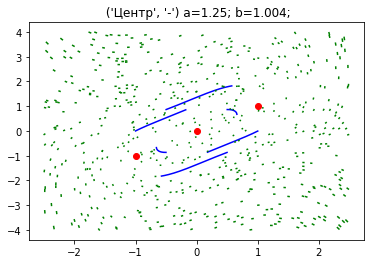

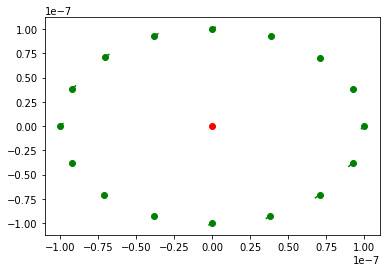

ValueError: ignored

In [ ]:
number=7#TODO Во всехточках равновесия траектории очень быстро удаляются.
(t0, t1), a,b = types[number]
m1_des=""
if b>=a:
    x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
    x_eq_m1, y_eq_m1 = x_eq, y_eq 
    plt.plot(x_eq,y_eq,'go')
    for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.001,n=10):
      xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=4000)
      plt.plot(xs, ys, color='g')
    plt.plot(x_eq, y_eq,'ro')
    m1_des =f"M1{x_eq, y_eq};"
    # plt.plot(xs, ys, color='g')
else:
  t1="-"

for (x0,y0) in get_point_on_circle(0,0,1.,n=6):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=800)
  plt.plot(xs, ys, color='b')
  # plt.plot(x0, y0,'mo')
plt.plot(0,0,'ro')
#almost isocline
for i in range(600):
  xr=2.5
  yr=4
  x0=random.uniform(-xr, xr)
  y0=random.uniform(-yr, yr)
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=5)
  plt.plot(xs, ys, color='g')

plt.plot(x_eq_m1, y_eq_m1, 'ro')
plt.plot(-x_eq_m1, -y_eq_m1, 'ro')
plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")
plt.show()
#Седло
x_eq, y_eq = 0,0
for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.0000001,n=16):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=20)
  plt.plot(xs, ys, color='g')
  plt.plot(x0, y0,'go')
plt.plot(x_eq, y_eq,'ro')
plt.show()
#Отдельно Неустойчивый узел в М1, М2

x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.00000001,n=20):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=100)
  plt.plot(xs, ys, color='g')
  # plt.plot(x0, y0,'go')
for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.000000005,n=12):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=200)
  plt.plot(xs, ys, color='m')
  # plt.plot(x0, y0,'mo')
plt.plot(x_eq, y_eq,'ro')

plt.show()

#### #8

In [ ]:
number=8
(t0, t1), a,b = types[number]
def pic():
  m1_des=""
  if b>=a:
    x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
    x_eq_m1, y_eq_m1 = x_eq, y_eq 
    plt.plot(x_eq,y_eq,'go')
    for r in [0.1, 0.2, 0.3, 0.5]:
      xs, ys = get_plot_runge_kutt(x_eq + r, y_eq, a=a, b=b, points_count=20000)
      plt.plot(xs, ys, color='g')      
    plt.plot(x_eq, y_eq,'ro')
    m1_des =f"M1{x_eq, y_eq};"
  else:
    t1="-"  

  for (x0,y0) in get_point_on_circle(0,0,2,n=7):
    xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=50000)
    plt.plot(xs, ys, color='b')
  plt.plot(0,0,'ro')

plt.plot(x_eq_m1, y_eq_m1, 'ro')
plt.plot(-x_eq_m1, -y_eq_m1, 'ro')
plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")

pic()
plt.show()

pic()
#cycles
plt.show()







#### #9 (a=1.3, b=2)

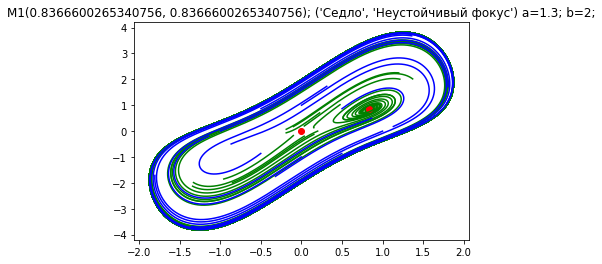

In [ ]:
number=9
(t0, t1), a,b = types[number]
m1_des=""
if b>=a:
    x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
    x_eq_m1, y_eq_m1 = x_eq, y_eq 
    plt.plot(x_eq,y_eq,'go')
    for (x0,y0) in get_point_on_circle(x_eq, y_eq,0.05,n=5):
      xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=10**5)
      plt.plot(xs, ys, color='g')
    plt.plot(x_eq, y_eq,'ro')
    m1_des =f"M1{x_eq, y_eq};"
    plt.plot(xs, ys, color='g')
else:
  t1="-"

for (x0,y0) in get_point_on_circle(0,0,1.,n=12):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=4000)
  plt.plot(xs, ys, color='b')
  # plt.plot(x0, y0,'mo')

for (x0,y0) in get_point_on_circle(0,0,0.2,n=9):
  xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, points_count=2000)
  plt.plot(xs, ys, color='g')
  # plt.plot(x0, y0,'go')
plt.plot(0,0,'ro')

plt.title(f"{m1_des} {(t0,t1)} a={a}; b={b};")
plt.show()


#**Стохастика**

###Рунге-Кутт

In [ ]:
def get_norm_random():
  a=random.random()
  b=random.random()
  return ((-2*math.log(a))**0.5*math.cos(2*math.pi*b),
          (-2*math.log(a))**0.5*math.sin(2*math.pi*b))
  
def get_plot_runge_kutt_stohastic(x0, y0, a=1, b=2, h=1e-2, points_count=10**5, rate=1e-2):
  xs=np.zeros(points_count)
  ys=np.zeros(points_count)
  xs[0]=x0
  ys[0]=y0

  for t in range(1, points_count):
    r1, r2 = get_norm_random()
    x=xs[t-1]
    y=ys[t-1]
    (xs[t], ys[t]) = get_next(x,y, a,b,h)
    xs[t]+=rate*math.sqrt(h)*r1#rate == epsilon
    ys[t]+=rate*math.sqrt(h)*r2
  return xs, ys



###Облака случайных состояний в зонах устойчивых равновесий

#### #1 (a=0.6, b=0.58)

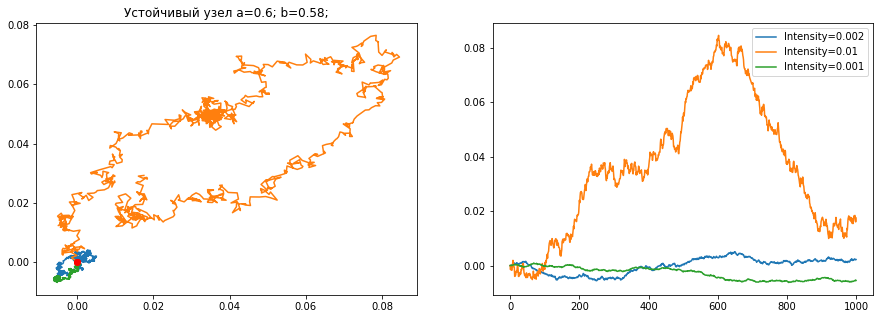

In [131]:
(t0, t1), a, b = types[1] #('Устойчивый узел', '-'), 0.6, 0.58)
x0, y0 = 0,0
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)  
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
points_count=1000
for rate in [0.002, 1e-2, 1e-3]:
  xs, ys = get_plot_runge_kutt_stohastic(x0, y0, a=a, b=b, points_count=points_count, rate=rate) 
  ts=np.arange(points_count)
  ax1.plot(xs, ys)
  ax1.plot(x0, y0, 'ro')
  ax1.set_title(f"{t0} a={a}; b={b};")
  line, =ax2.plot(ts, xs)
  line.set_label(f"Intensity={rate}")
  ax2.legend()
  # plt.title(f"Intencity={rate}")
plt.show()  

#### #4 (a=0.7, b=2)

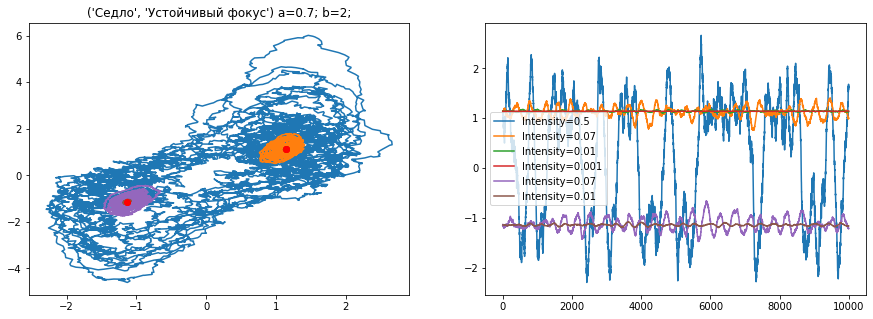

In [ ]:
(t0, t1), a, b = types[4]
x0, y0 = math.sqrt(b-a), math.sqrt(b-a)
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)  
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
points_count=10000
for rate in [0.5,0.07, 1e-2, 1e-3]:
  xs, ys = get_plot_runge_kutt_stohastic(x0, y0, a=a, b=b, points_count=points_count, rate=rate) 
  ts=np.arange(points_count)
  ax1.plot(xs, ys)
  ax1.plot(x0, y0, 'ro')
  ax1.set_title(f"{(t0,t1)} a={a}; b={b};")
  line, =ax2.plot(ts, xs)
  line.set_label(f"Intensity={rate}")

x0, y0 = -math.sqrt(b-a), -math.sqrt(b-a)
for rate in [0.07, 1e-2]:
  xs, ys = get_plot_runge_kutt_stohastic(x0, y0, a=a, b=b, points_count=points_count, rate=rate) 
  ts=np.arange(points_count)
  ax1.plot(xs, ys)
  ax1.plot(x0, y0, 'ro')
  ax1.set_title(f"{(t0,t1)} a={a}; b={b};")
  line, =ax2.plot(ts, xs)
  line.set_label(f"Intensity={rate}")

ax2.legend()
plt.show()  



###Ковариация

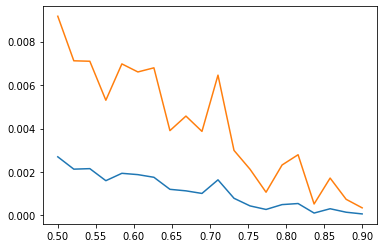

In [ ]:
a_line=np.linspace(0.5, 0.9, 20)
b=2
points_count=10000
x0, y0 = math.sqrt(b-a),math.sqrt(b-a) 
r0=[]
r1=[]
for a in a_line:
  xs, ys = get_plot_runge_kutt_stohastic(x0, y0, a=a, b=b, h=1e-3, points_count=points_count) 
  cov_matrix=np.cov(xs, ys)
  eig_values, eig_vectors = np.linalg.eig(cov_matrix)
  r0.append(eig_values[0])
  r1.append(eig_values[1])

plt.plot(a_line, r0)
plt.plot(a_line, r1)